# Corpus statistics and collocations

In this practical exercise we will analyze the distribution of words in your corpus and extract collocations.

In [1]:
# import some general modules
import logging

# set logging level (suggested: logging.INFO; for bug fixing: logging.DEBUG)
logging_level = logging.INFO
#logging_level = logging.DEBUG

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging_level)

# 1. Load your own corpus

Load your corpus data which you created during exercise session 1.

In [2]:
import gzip
import json

def load_data(filename):
    return json.loads(gzip.GzipFile(filename).read().decode('utf-8'))

In [3]:
# you might have to modify this filename to match your own corpus data
corpus_data_filename = 'all_data2_0.json.gz'

corpus_texts = load_data(corpus_data_filename)
logging.info('Read corpus with %d texts (average length: %d characters).' % (len(corpus_texts), int(sum([len(text) for text in corpus_texts])/float(len(corpus_texts)))))

INFO:Read corpus with 5736 texts (average length: 743 characters).


# 2. Apply text processing

As we want to analyze words in this exercise, we first have to apply tokenization to our running text corpus to detect word boundaries in a uniform manner. Tokenization is a typical NLP task applied as a first step to process text. Tokenization is often considered as a solved problem. However, e.g. when handling social media data, we might only reach an accurracy of 99%, which means, considering that a sentence on average might consist of 10 tokens, we would make an error in every 10th sentence. This is a significant problem as the error propagates to further processing steps.

The output of a corpus tokenization is a list of its tokens. The term "token" is often used as a synonym to "word", however, to be precise, you should stick to token. For example, one might not consider punctuation marks as words, however, they are certainly tokens.

There are several methods for tokenization. Here we show you how to use the tokenizer implemented in nltk https://www.nltk.org/ which does the detection of sentence and word boundaries separately.

In [4]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# depending on the source of your data, you might want to use the nltk-"tweet tokenizer" which considers special social media language phenomena, such as emoticons and html entities
use_tweet_tokenizer = False
if use_tweet_tokenizer:
    from nltk.tokenize.casual import TweetTokenizer
    word_tokenize = TweetTokenizer().tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [5]:
# now tokenize your corpus data (this might run for a few seconds)

sentences = []
for text in corpus_texts:
    for sentence in sent_tokenize(text):
        sentences.append(word_tokenize(sentence))

logging.info('Tokenized corpus into %d sentences (average length: %d tokens); total %d tokens.' % (len(sentences), int(sum([len(sentence) for sentence in sentences])/float(len(sentences))), sum([len(sentence) for sentence in sentences])))

INFO:Tokenized corpus into 40907 sentences (average length: 22 tokens); total 902959 tokens.


# 3. Corpus statistics

Here we run some very basic corpus statistics. We analyze the distribution of words in our data which can give a first general insight in the subset of language we have here.

## 3.1 Count word frequencies

We will use the term "frequency" of a word type to express the absolute number of times this word occurs (in any context) in our corpus.

Please note the terminological distinction:<br>
token: Word forms occuring in a text. The sentence "This is it, is it?" has 7 tokens \['This', 'is', 'it', ',', 'is', 'it', '?'\].<br>
type: Unique word forms in a text. The sentence "This is it, is it?" has 5 types {',', '?', 'This', 'is', 'it'}<br>
A language/vocabulary consists of several word types; a corpus consists of tokens (which are mentions/occurrences of these types).

In [6]:
# count words and their frequencies
from collections import Counter

words = Counter(word for sentence in sentences for word in sentence)

Let us look at the counts:

In [9]:
# total number of types in the corpus
logging.info('Total number of types (unique words): %d' % len(words))

# total number of tokens in the corpus
logging.info('Total number of tokens: %d' % sum(words.values()))

# how many words occur only once?
logging.info('Number of types with frequency of occurrence 1: %d' % len([word for word in words if words[word] == 1]))

# show the frequency of some words
for word in ('day', 'night', 'music', 'string'):
    logging.info('Frequency of word %s: %d' % (word, words[word]))

INFO:Total number of types (unique words): 32855
INFO:Total number of tokens: 902959
INFO:Number of types with frequency of occurrence 1: 18938
INFO:Frequency of word day: 236
INFO:Frequency of word night: 62
INFO:Frequency of word music: 463
INFO:Frequency of word string: 971


## 3.2 Analyze the distribution of words

#### Build and plot word rank

Assign each word a rank according the sorting by its frequency, i.e. the most frequent word gets rank 1, the 2nd most frequent word gets rank 2, etc.

In [10]:
# sort words according to their frequency
sorted_words = sorted(words, key=lambda word: words[word], reverse=True)

# print the 10 most frequent words
print(sorted_words[:10])

['.', 'the', ',', 'I', 'a', 'and', 'to', 'it', 'is', 'of']


In [12]:
# assign each word a rank
word_ranks = {word: rank+1 for rank, word in enumerate(sorted_words)}

for word in ('day', 'night', 'music', 'key', 'the', 'that'):
    logging.info('Rank of word %s: %d' % (word, word_ranks[word]))

INFO:Rank of word day: 422
INFO:Rank of word night: 1264
INFO:Rank of word music: 255
INFO:Rank of word key: 1245
INFO:Rank of word the: 2
INFO:Rank of word that: 12


In [13]:
# now we assign each (word) rank the (word) frequency
frequency_ranks = {word_ranks[word]: frequency for word, frequency in words.items()}

print(list(frequency_ranks.items())[:10])

[(309, 354), (79, 1631), (7, 19572), (1842, 36), (70, 1824), (320, 340), (3, 31438), (20, 5936), (8, 16652), (69, 1847)]


Now we have a dictionary or mapping of a rank to a frequency, e.g. the 8th most frequent word (=rank 8) has a frequency of occurrence of 10508.

In [15]:
# now we can plot the distribution
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(frequency_ranks.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

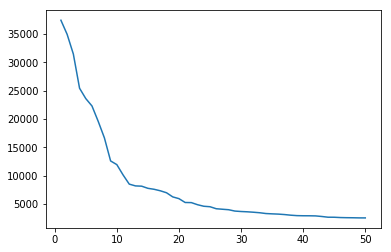

In [41]:
# plot some values
n_limit = 50

plt.plot(x[:n_limit], y[:n_limit])
plt.show()

# The x-axis corresponds to the rank, the y-axis shows the frequency

## 3.3 Plotting Zipfs Law

Zipf's law states that: \begin{equation}\textit{occurrence_probability}(\textit{word}) = \frac{c}{\text{rank}(\textit{word})}\end{equation}
In other words: the occurrence probability of a word is inversely proportional to its frequency rank (with a corpus specific constant c).

We can compute the occurrence probability of a word based on corpus data as follows:
\begin{equation}
    \textit{occurrence_probability}(\textit{word}) = \frac{\textit{frequency of occurrence}(\textit{word})}{\textit{number of all words}}
\end{equation}
For example, when a word occurs 20 times in a corpus of 100 tokens, its occurrence_probability is $0.2$.

Above we calculated the frequency of occurrence of each word in our data. We now want to plot this value against the rank using Zipf's law and the formulae above.

\begin{equation}
\frac{\textit{frequency of occurrence}(\textit{word})}{\textit{number of all words}} = \frac{c}{\text{rank}(\textit{word})}
\end{equation}

\begin{equation}
\textit{frequency of occurrence}(\textit{word}) = \frac{c * \textit{number of all words}}{\text{rank}(\textit{word})}
\end{equation}

Thus, for any given rank $x$, the plot should display:
\begin{equation}
y = \frac{c * \textit{number of all words}}{x}
\end{equation}


In [27]:
import numpy as np

# set the constant c to 1 for now
c = 1

# our plot should show values for rank x from 1 to n_limit
x_zipf = np.array(range(1, n_limit+1))

# y implements the last formula above
y_zipf = c * sum(words.values())/x_zipf

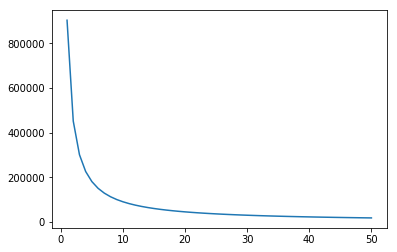

In [28]:
plt.plot(x_zipf, y_zipf)
plt.show()

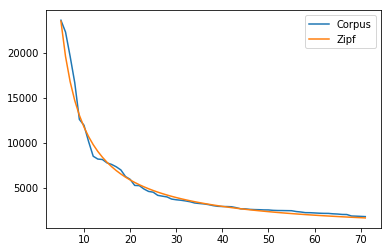

In [46]:
# now let us plot Zipf and our corpus based data together

n_minimum = 4
n_limit = 71

c = 0.13
#c = 0.15
#c = 0.2

# plot our data
plt.plot(x[n_minimum:n_limit], y[n_minimum:n_limit], label='Corpus')

# plot Zipf
x_zipf = np.array(range(n_minimum + 1, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf
plt.plot(x_zipf, y_zipf, label='Zipf')

plt.legend()
plt.show()

# 4. Collocations

"a pair or group of words that are habitually juxtaposed"

## 4.1 Co-occuring word pairs

We only have the frequencies of individual words so far.

To compute collocation measure we need frequencies of co-occurring word pairs.

For example, the tokenized sentence ['This', 'is', 'it', ',', 'is', 'it', '?']. has the following co-occuring word pairs:
- ('This', 'is') frequency 1
- ('is', 'it') frequency 2
- ('it', ',') frequency 1
- (',', 'is') frequency 1
- ('it', '?') frequency 1

Note that the sentence has 7 tokens, thus, 6 co-occurring word pairs (also known as bigrams), however, one of those occurs twice.

We now count these for our entire corpus.

In [47]:
# count frequencies of word pairs in our corpus

from collections import Counter

all_word_pairs = Counter((word, sentence[index+1])
                         for sentence in sentences
                         for index, word in enumerate(sentence)
                         if index+1 < len(sentence))

In [48]:
# let us look at some
print('The 10 most frequent word pairs:')
print(sorted(all_word_pairs.items(), key=lambda pair: pair[1], reverse=True)[:10])

print('\nThe number of unique word pairs:')
print(len(all_word_pairs))

print('\nThe number of unique word pairs with a frequency greater than 1:')
print(len([pair for pair, frequency in all_word_pairs.items() if frequency > 1]))

The 10 most frequent word pairs:
[((',', 'and'), 4110), ((',', 'but'), 3461), (('of', 'the'), 2873), ((',', 'I'), 2518), (('I', 'have'), 2266), (('on', 'the'), 2090), (('it', "'s"), 1960), (('is', 'a'), 1812), (('in', 'the'), 1602), (('do', "n't"), 1527)]

The number of unique word pairs:
251522

The number of unique word pairs with a frequency greater than 1:
72405


In [50]:
# to make it computationally feasible, only analyze word pairs with freq > some threshold
# you might have to increase this value if running the cells in 4.2 take too long to finish
threshold = 15
word_pairs = {word_pair: frequency for word_pair, frequency in all_word_pairs.items() if frequency > threshold}
print(len(word_pairs))

6783


In [51]:
# look at some of our word pairs with their frequency again to get a feeling for this data structure
print(list(word_pairs.items())[:10])

[(('Not', 'much'), 25), (('much', 'to'), 47), (('here', ','), 37), ((',', 'but'), 3461), (('but', 'it'), 750), (('it', 'does'), 585), (('does', 'exactly'), 26), (('exactly', 'what'), 96), (('what', 'it'), 185), (('it', "'s"), 1960)]


## 4.2 Collocation measures

Above we actually used the most basic collocation measure: the frequency $o_{11}$ of the co-occurring word pair.

In [52]:
# here we will compute the contingency table for all co-occuring word pairs (this might take a few seconds)

from collections import defaultdict

o11 = word_pairs
o12 = defaultdict(int)
o21 = defaultdict(int)
o22 = defaultdict(int)

for word_pair in word_pairs:
    word1, word2 = word_pair
    for other_word_pair in word_pairs:
        other_word1, other_word2 = other_word_pair
        if word1 == other_word1:
            if word2 != other_word2:
                o12[word_pair] += word_pairs[other_word_pair]
            else:
                # we already have this case in word_pairs
                pass
        else:
            if word2 == other_word2:
                o21[word_pair] += word_pairs[other_word_pair]
            else:
                o22[word_pair] += word_pairs[other_word_pair]

# set min value to 1
for pair in word_pair:
    for cell in (o12, o21, o22):
        if not cell[word_pair]:
            cell[word_pair] = 1

contingency_tables = {'o11': o11, 'o12': o12, 'o21': o21, 'o22': o22}

In [53]:
# A function to print highest ranked collocations, using given collocation measure to compute ranking
def print_highest_ranked_collocations(measure, top=10, tables=contingency_tables):
    for pair in sorted(tables['o11'], key=lambda word_pair: measure(word_pair, tables), reverse=True)[:top]:
        print((pair, tables['o11'][pair]))

In [54]:
import math

# mutual information
def mi(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return math.log(pair_o11/pair_e11)

print_highest_ranked_collocations(mi, top=20)

(('tap', 'tempo'), 16)
(('Custom', 'Comp'), 16)
(('reasonably', 'priced'), 17)
(('personal', 'preference'), 17)
(('Ultimate', 'Drive'), 17)
(('Audio', 'Technica'), 17)
(('Garage', 'Band'), 18)
(('rubber', 'feet'), 18)
(('old', 'school'), 20)
(('daisy', 'chain'), 21)
(('frequency', 'response'), 23)
(('Carbon', 'Copy'), 23)
(('free', 'shipping'), 24)
(('gon', 'na'), 24)
(('Phosphor', 'Bronze'), 26)
(('Super', 'Champ'), 26)
(('Windows', '7'), 26)
(('planet', 'waves'), 27)
(('Jazz', 'III'), 27)
(('Bad', 'Monkey'), 28)


In [55]:
def z_score(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return (pair_o11 - pair_e11) / math.sqrt(pair_e11)

print_highest_ranked_collocations(z_score, top=20)

(('tap', 'tempo'), 16)
(('Custom', 'Comp'), 16)
(('reasonably', 'priced'), 17)
(('personal', 'preference'), 17)
(('Ultimate', 'Drive'), 17)
(('Audio', 'Technica'), 17)
(('Garage', 'Band'), 18)
(('rubber', 'feet'), 18)
(('old', 'school'), 20)
(('daisy', 'chain'), 21)
(('frequency', 'response'), 23)
(('Carbon', 'Copy'), 23)
(('free', 'shipping'), 24)
(('gon', 'na'), 24)
(('Phosphor', 'Bronze'), 26)
(('Super', 'Champ'), 26)
(('Windows', '7'), 26)
(('planet', 'waves'), 27)
(('Jazz', 'III'), 27)
(('Bad', 'Monkey'), 28)


In [75]:
def cooccurence(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_R2 = pair_o21 + pair_o22
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_C2 = pair_C1 = pair_N
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return (pair_o11 - pair_e11) / math.sqrt(pair_e11)

print_highest_ranked_collocations(cooccurence, top=40)

(('supposed', 'to'), 112)
(('pop', 'filter'), 51)
(('next', 'to'), 53)
(('hook', 'up'), 17)
(('Planet', 'Waves'), 176)
(('return', 'it'), 24)
(('glad', 'I'), 82)
(('either', '.'), 56)
(('build', 'quality'), 89)
(('holding', 'up'), 19)
(('habit', 'of'), 17)
(('near', 'the'), 24)
(('decided', 'to'), 183)
(('tend', 'to'), 83)
(('reasonably', 'priced'), 17)
(('kind', 'of'), 229)
(('meant', 'to'), 24)
(('6', 'months'), 21)
(('tighten', 'the'), 18)
(('able', 'to'), 306)
(('Works', 'great'), 26)
(('due', 'to'), 127)
(('searching', 'for'), 26)
(('flawlessly', '.'), 16)
(('realize', 'that'), 20)
(('Still', ','), 34)
(('34', ';'), 994)
(('reliable', 'and'), 21)
(('ends', 'are'), 33)
(('update', 'this'), 20)
(('lots', 'of'), 81)
(('arrived', 'in'), 19)
(('guess', 'I'), 22)
(('surprised', 'at'), 25)
(('he', 'was'), 16)
(('musician', ','), 26)
(('comment', 'on'), 21)
(('40', 'years'), 25)
(('sweet', 'spot'), 29)
(('mounted', 'on'), 16)


In [56]:
def frequency(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    return pair_o11

print_highest_ranked_collocations(frequency, top=20)

((',', 'and'), 4110)
((',', 'but'), 3461)
(('of', 'the'), 2873)
((',', 'I'), 2518)
(('I', 'have'), 2266)
(('on', 'the'), 2090)
(('it', "'s"), 1960)
(('is', 'a'), 1812)
(('in', 'the'), 1602)
(('do', "n't"), 1527)
(('I', "'ve"), 1520)
((',', 'it'), 1504)
(('and', 'the'), 1500)
(('with', 'the'), 1464)
((',', 'the'), 1427)
(('to', 'the'), 1414)
(('for', 'the'), 1354)
(('and', 'I'), 1346)
(('for', 'a'), 1296)
(('it', 'is'), 1281)


In [89]:
# space for other measures



## Bonus: plot the distribution of word pairs and Zipf's law formula


In [57]:
# distribution of co-occurring word pairs
# 1. sort word pairs by their frequency:
sorted_all_word_pairs = sorted(all_word_pairs, key=lambda pair: all_word_pairs[pair], reverse=True)
# print(sorted_all_word_pairs[:5])

# 2. assign word pairs their rank in the frequency order
ranked_all_word_pairs = {word_pair: rank + 1 for rank, word_pair in enumerate(sorted_all_word_pairs)}
# print(ranked_all_word_pairs.items()[:5])

# 3. map ranks to the corresponding frequency
rank_frequency_word_pairs = {rank: all_word_pairs[word_pair] for word_pair, rank in ranked_all_word_pairs.items()}
# print(rank_frequency_word_pairs.items()[:5])

# prepare values to plot
lists_pairs = sorted(rank_frequency_word_pairs.items()) # sorted by key, return a list of tuples
x_pairs, y_pairs = zip(*lists_pairs) # unpack a list of pairs into two tuples

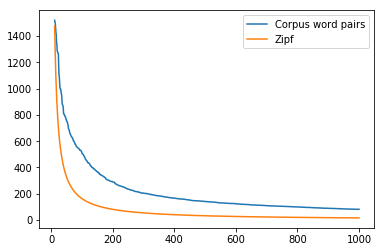

In [73]:
n_minimum = 10
n_limit = 1000

c = 0.018
# can you fit c to match Zipf to your word pairs?

# plot our data
plt.plot(x_pairs[n_minimum:n_limit], y_pairs[n_minimum:n_limit], label='Corpus word pairs')

# plot Zipf
x_zipf = np.array(range(n_minimum + 1, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf
plt.plot(x_zipf, y_zipf, label='Zipf')

plt.legend()
plt.show()